In [17]:
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
#read the data
df = pd.read_csv("BS_test.csv")
features_li = ['JS', 'MM', 'Permits']
features = df[features_li]
features.index = df['Date Time']
data = features.dropna()

In [3]:
#check the dtypes
data.dtypes

JS         float64
MM         float64
Permits    float64
dtype: object

In [4]:
#missing value treatment
cols = data.columns
for j in cols:
    for i in range(0,len(data)):
       if data[j][i] == -200:
           data[j][i] = data[j][i-1]

In [5]:
#checking stationarity
coint_johansen(data,-1,1).eig

array([0.11680371, 0.04817025, 0.02747427])

In [6]:
#creating the train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

In [7]:
#fit the model
model = VAR(endog=train)
model_fit = model.fit()

c:\program files\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [8]:
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

c:\program files\python37\lib\site-packages\statsmodels\base\wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [9]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,3):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

In [10]:
pred

,JS,MM,Permits
0,3.98766,3.15932,-1.37545
1,4.05517,3.22385,-1.42385
2,4.12168,3.2883,-1.46812
3,4.18686,3.35242,-1.50866
4,4.25042,3.41595,-1.54584
5,4.31211,3.47866,-1.58008
6,4.3717,3.54034,-1.61177
7,4.42903,3.6008,-1.64135
8,4.48393,3.65986,-1.6692
9,4.53631,3.71739,-1.69572


In [11]:
#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[[i]], valid[i])))

rmse value for JS is :  5.814022258493074
rmse value for MM is :  5.6442828964267795
rmse value for Permits is :  9.469492151956008


In [12]:
#make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[-2.4190809  -3.08992348  1.46963052]]


c:\program files\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


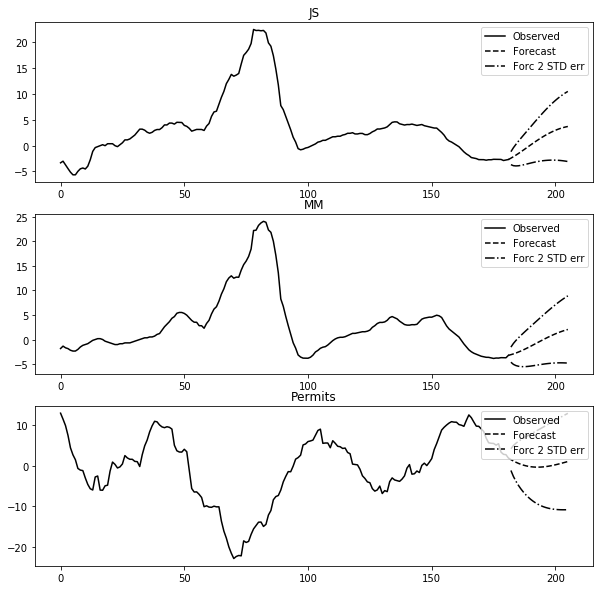

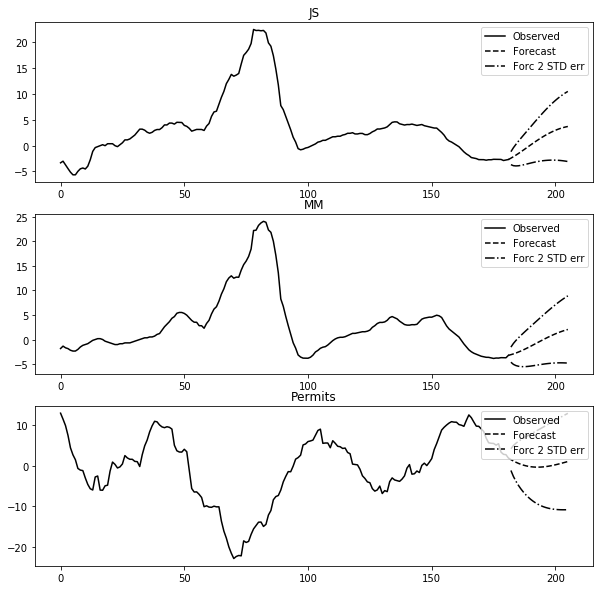

In [15]:
model_fit.plot_forecast(24)

In [21]:
#make ARIMAX predictions (univariate)
model_ARIMA = ARIMA(endog=data['MM'], order=[1,1,0])
results = model_ARIMA.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.MM   No. Observations:                  181
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -148.180
Method:                       css-mle   S.D. of innovations              0.547
Date:                Mon, 20 Jan 2020   AIC                            302.360
Time:                        14:05:57   BIC                            311.956
Sample:                    11-01-2004   HQIC                           306.250
                         - 11-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0086      0.160      0.054      0.957      -0.305       0.323
ar.L1.D.MM     0.7501      0.049     15.445      0.000       0.655       0.845
                                    Roots           

c:\program files\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\program files\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [23]:
#yhat = results.forecast(model_fit.y, steps=[1,1,0])
#print(yhat)

TypeError: forecast() got multiple values for argument 'steps'